In [108]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns 

In [109]:
traditional_82 = pd.read_csv('./82_team_dataset/2000-2021-T.csv')

traditional_20 = pd.read_csv('./20_team_dataset/2000-2021-T.csv').drop(['GP','W', 'L'], axis=1)
advanced_20 = pd.read_csv('./20_team_dataset/2000-2021-A.csv').drop(['GP','W', 'L'], axis=1)
opponent_20 = pd.read_csv('./20_team_dataset/2000-2021-OPP.csv').drop(['GP','W', 'L'], axis=1)

In [110]:
merge_82 = traditional_82[['Team', 'Year', 'WIN%']]
traditional_20

,#,Team,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Year
0,1,Philadelphia 76ers,0.800,48.0,93.1,34.1,77.3,44.1,2.8,9.8,...,44.0,19.4,16.5,8.8,6.1,6.3,22.1,0.0,7.3,2000
1,1,Utah Jazz,0.800,48.3,98.5,37.1,75.9,48.8,3.9,10.1,...,39.4,26.2,16.1,8.3,6.2,5.8,26.3,0.1,9.0,2000
2,3,Sacramento Kings,0.778,49.1,100.2,37.8,84.9,44.6,5.3,15.8,...,44.4,23.6,15.7,10.2,5.4,5.2,21.3,0.0,10.1,2000
3,4,Phoenix Suns,0.684,48.8,94.5,36.1,81.9,44.0,5.1,14.8,...,42.3,23.3,16.7,10.3,5.7,5.4,23.8,0.1,5.6,2000
4,5,Los Angeles Lakers,0.682,48.5,102.0,39.8,83.7,47.5,5.6,15.5,...,44.9,24.1,15.4,6.5,7.4,4.1,22.4,0.0,4.1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26,Chicago Bulls,0.381,48.2,115.0,42.2,88.6,47.7,13.4,36.1,...,43.7,26.1,16.7,7.7,3.8,3.8,20.8,20.7,-2.4,2020
622,27,Miami Heat,0.364,48.5,107.2,38.6,82.5,46.8,13.1,37.0,...,41.9,25.7,17.1,6.7,3.9,4.2,20.1,20.9,-3.9,2020
623,28,Minnesota Timberwolves,0.273,48.2,106.4,39.7,91.3,43.5,11.9,34.5,...,43.8,23.8,14.5,8.4,5.7,6.3,21.5,18.3,-8.5,2020
624,29,Washington Wizards,0.263,48.0,115.2,41.7,91.0,45.9,12.3,34.3,...,43.4,25.2,13.9,7.1,3.8,4.2,22.8,21.4,-6.0,2020


In [111]:
everything = pd.merge(traditional_20, opponent_20, how="inner", on=["Team", "Year"])
everything = everything.drop(['#_x','#_y', '+/-_y'], axis=1)
everything = pd.merge(everything, advanced_20, how="inner", on=["Team", "Year"])
everything = everything.drop(['#'], axis=1).rename(columns={'+/-_x': '+/-', 'MIN_x': "MIN AVG", 'MIN_y': 'MIN TOTAL'})
everything = pd.merge(everything, merge_82, how="inner", on=["Team", "Year"])
everything = everything.rename(columns={'WIN%_y': 'WIN_FINAL', 'WIN%_x': 'WIN%'})
everything

,Team,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,WIN_FINAL
0,Philadelphia 76ers,0.800,48.0,93.1,34.1,77.3,44.1,2.8,9.8,28.2,...,31.5,67.8,50.5,17.8,45.7,51.2,93.69,56.3,1973,0.683
1,Utah Jazz,0.800,48.3,98.5,37.1,75.9,48.8,3.9,10.1,38.3,...,32.0,70.6,51.8,17.3,50.8,55.0,91.69,57.4,1939,0.646
2,Sacramento Kings,0.778,49.1,100.2,37.8,84.9,44.6,5.3,15.8,33.3,...,30.8,69.4,50.2,15.7,47.6,52.1,96.10,57.9,1874,0.671
3,Phoenix Suns,0.684,48.8,94.5,36.1,81.9,44.0,5.1,14.8,34.0,...,30.1,68.8,49.5,17.5,47.2,51.2,94.03,55.1,1908,0.622
4,Los Angeles Lakers,0.682,48.5,102.0,39.8,83.7,47.5,5.6,15.5,36.0,...,35.0,69.8,52.4,16.1,50.8,53.6,94.06,53.0,2183,0.683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Chicago Bulls,0.381,48.2,115.0,42.2,88.6,47.7,13.4,36.1,37.2,...,26.1,75.6,51.2,16.5,55.4,58.8,103.39,49.7,2084,0.431
622,Miami Heat,0.364,48.5,107.2,38.6,82.5,46.8,13.1,37.0,35.5,...,22.3,72.3,48.4,17.0,54.5,57.9,99.70,48.5,2116,0.556
623,Minnesota Timberwolves,0.273,48.2,106.4,39.7,91.3,43.5,11.9,34.5,34.3,...,26.4,70.1,47.4,14.1,49.8,53.1,101.99,44.7,2148,0.319
624,Washington Wizards,0.263,48.0,115.2,41.7,91.0,45.9,12.3,34.3,35.8,...,24.7,74.9,48.8,13.1,53.2,56.8,104.53,47.2,1882,0.472


In [112]:
dataset = everything.drop(['Team', 'Year'], axis=1)
winPercentage = dataset.iloc[:,-1:].values
playoffStatus = map(lambda x: x > 0.5, winPercentage)
playoffStatus = np.fromiter(playoffStatus, dtype=bool)
dataset['Playoffs'] = playoffStatus
dataset

,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,WIN_FINAL,Playoffs
0,0.800,48.0,93.1,34.1,77.3,44.1,2.8,9.8,28.2,22.2,...,67.8,50.5,17.8,45.7,51.2,93.69,56.3,1973,0.683,True
1,0.800,48.3,98.5,37.1,75.9,48.8,3.9,10.1,38.3,20.5,...,70.6,51.8,17.3,50.8,55.0,91.69,57.4,1939,0.646,True
2,0.778,49.1,100.2,37.8,84.9,44.6,5.3,15.8,33.3,19.3,...,69.4,50.2,15.7,47.6,52.1,96.10,57.9,1874,0.671,True
3,0.684,48.8,94.5,36.1,81.9,44.0,5.1,14.8,34.0,17.4,...,68.8,49.5,17.5,47.2,51.2,94.03,55.1,1908,0.622,True
4,0.682,48.5,102.0,39.8,83.7,47.5,5.6,15.5,36.0,16.9,...,69.8,52.4,16.1,50.8,53.6,94.06,53.0,2183,0.683,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.381,48.2,115.0,42.2,88.6,47.7,13.4,36.1,37.2,17.0,...,75.6,51.2,16.5,55.4,58.8,103.39,49.7,2084,0.431,False
622,0.364,48.5,107.2,38.6,82.5,46.8,13.1,37.0,35.5,16.9,...,72.3,48.4,17.0,54.5,57.9,99.70,48.5,2116,0.556,True
623,0.273,48.2,106.4,39.7,91.3,43.5,11.9,34.5,34.3,15.1,...,70.1,47.4,14.1,49.8,53.1,101.99,44.7,2148,0.319,False
624,0.263,48.0,115.2,41.7,91.0,45.9,12.3,34.3,35.8,19.4,...,74.9,48.8,13.1,53.2,56.8,104.53,47.2,1882,0.472,False


In [113]:
X = dataset.iloc[:,0:-3]  #independent columns
y = dataset.iloc[:,-1:]    #target column

In [114]:
#apply SelectKBest class to extract top 50 best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 50 best features

        Specs       Score
0        WIN%  564.595255
22        +/-  549.947271
47     NETRTG  541.795892
58        PIE  527.001872
26    OPP FG%  127.715348
46     DEFRTG  121.343219
45     OFFRTG  117.840679
5         FG%  111.062624
56        TS%  105.837755
55       EFG%   86.280343
36    OPP AST   78.405580
50  AST RATIO   75.381889
49     AST/TO   64.781698
39    OPP BLK   60.958712
19       BLKA   60.289672
8         3P%   49.024775
15        AST   47.422512
43    OPP PTS   45.369680
29    OPP 3P%   43.074419
53       REB%   39.984823
2         PTS   35.004225
24    OPP FGM   32.941480
13       DREB   31.180745
35    OPP REB   29.587333
34   OPP DREB   28.660790
48       AST%   27.845652
30    OPP FTM   26.026028
3         FGM   24.119646
18        BLK   24.104576
16        TOV   23.725689
40   OPP BLKA   23.297225
31    OPP FTA   21.714482
54       TOV%   20.153283
42    OPP PFD   18.932593
20         PF   17.788805
14        REB   16.863121
9         FTM   14.770576
41     OPP P

/Users/marcteoong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


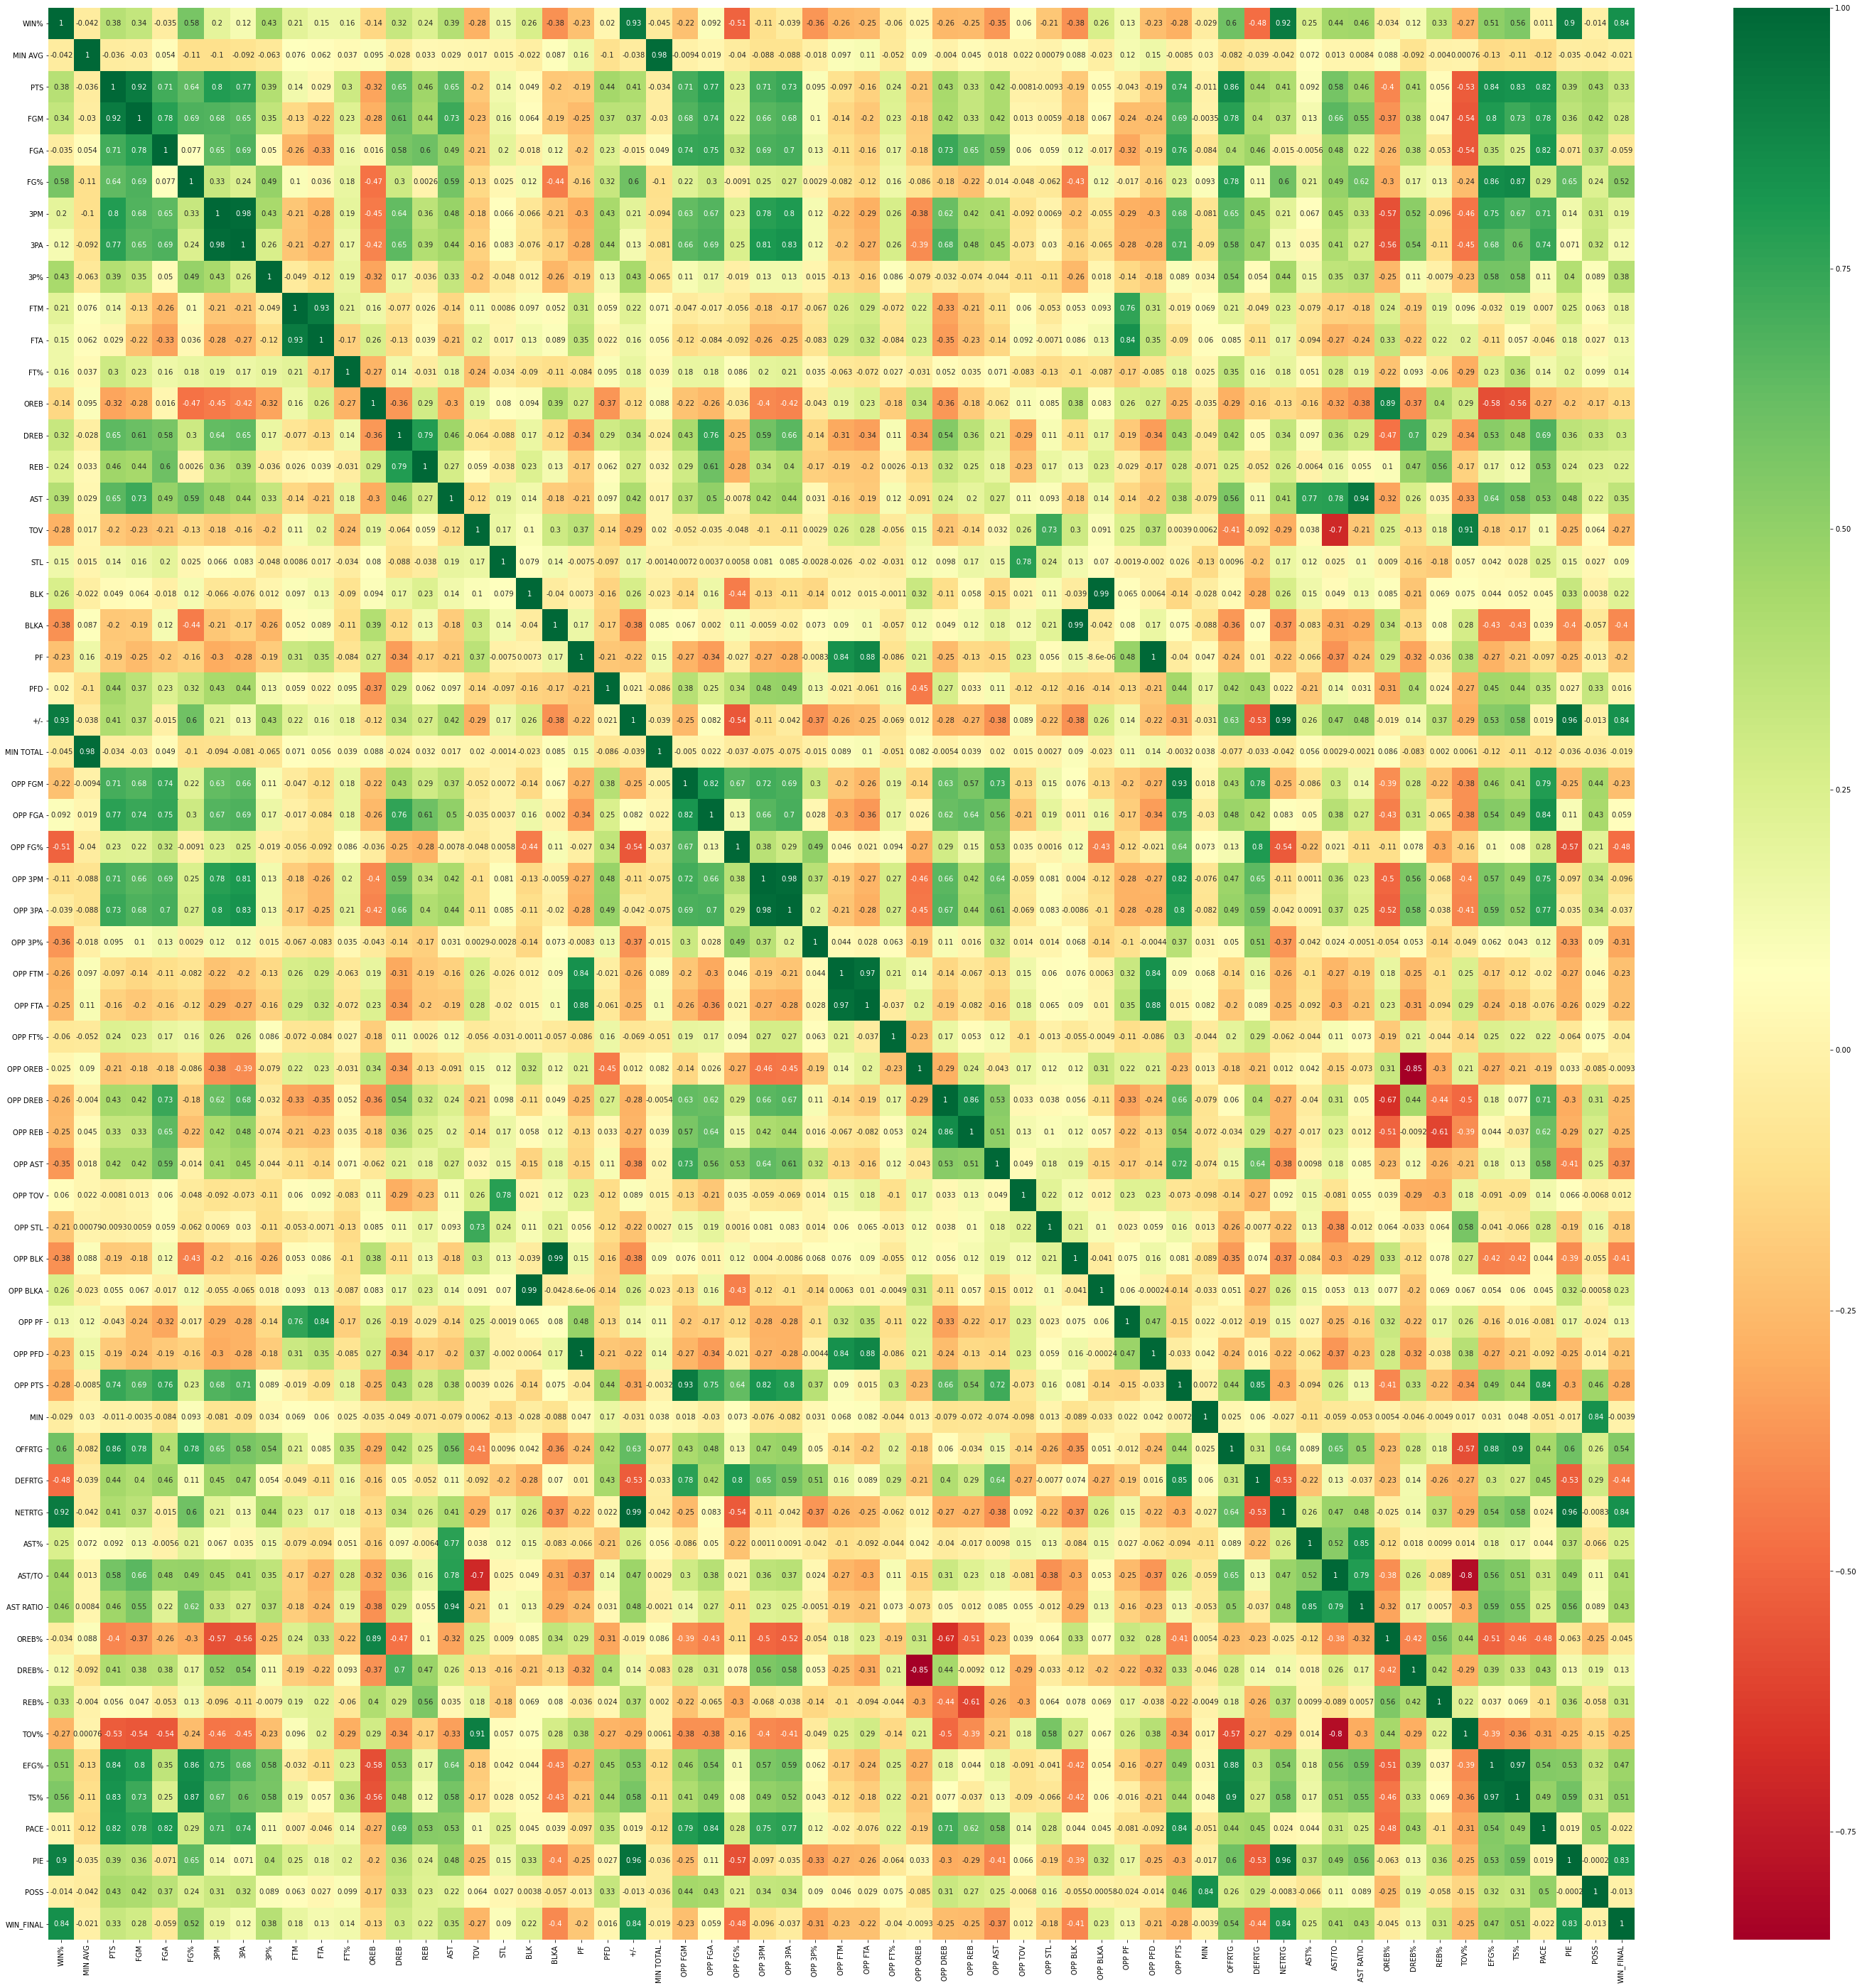

In [98]:
corrmat = dataset.drop(['Playoffs'], axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(everything[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [167]:
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = dataset.rename(columns={'Playoffs': 'Class'}).Class
X = dataset.rename(columns={'Playoffs': 'Class'}).drop(['Class'], axis=1)
X = X[['NETRTG', 'PIE', '+/-', 'WIN%', 'FG%', 'OPP FG%', 'OFFRTG', 'TS%', 'EFG%', 'DEFRTG', '3P%', 'OPP 3P%', 'BLKA', 'OPP BLK', 
       'REB%', 'OPP AST', 'AST/TO', 'OPP REB', 'AST RATIO', 'PTS', 'DREB', 'OPP DREB', 'OPP PTS', 
       'OPP FGM', 'FGM', 'AST', 'BLK', 'OPP BLKA', 'OPP FTM', 'REB', 'TOV', 'OPP FTA', 'OPP STL', 
       'TOV%', '3PM', 'PF', 'OPP PFD', 'FT%', 'DREB%', 'FTM', 'STL']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2345123)

In [168]:
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

# Use the predict() on the model to predict the output
pred=DT.predict(X_test)
 
# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.7643312101910829
0.7516778523489933
[[64 22]
 [15 56]]
              precision    recall  f1-score   support

       False       0.81      0.74      0.78        86
        True       0.72      0.79      0.75        71

    accuracy                           0.76       157
   macro avg       0.76      0.77      0.76       157
weighted avg       0.77      0.76      0.76       157



In [169]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(X_train, y_train)

pred=logistic.predict(X_test)
 
# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.8535031847133758
0.8496732026143791
[[69 13]
 [10 65]]
              precision    recall  f1-score   support

       False       0.87      0.84      0.86        82
        True       0.83      0.87      0.85        75

    accuracy                           0.85       157
   macro avg       0.85      0.85      0.85       157
weighted avg       0.85      0.85      0.85       157



In [170]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

pred=svc.predict(X_test)
 
# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.8280254777070064
0.8235294117647058
[[67 15]
 [12 63]]
              precision    recall  f1-score   support

       False       0.85      0.82      0.83        82
        True       0.81      0.84      0.82        75

    accuracy                           0.83       157
   macro avg       0.83      0.83      0.83       157
weighted avg       0.83      0.83      0.83       157



In [171]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred=knn.predict(X_test)

# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.8280254777070064
0.8187919463087248
[[69 17]
 [10 61]]
              precision    recall  f1-score   support

       False       0.87      0.80      0.84        86
        True       0.78      0.86      0.82        71

    accuracy                           0.83       157
   macro avg       0.83      0.83      0.83       157
weighted avg       0.83      0.83      0.83       157



In [172]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

pred=forest.predict(X_test)

# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.8343949044585988
0.8266666666666667
[[69 16]
 [10 62]]
              precision    recall  f1-score   support

       False       0.87      0.81      0.84        85
        True       0.79      0.86      0.83        72

    accuracy                           0.83       157
   macro avg       0.83      0.84      0.83       157
weighted avg       0.84      0.83      0.83       157



In [173]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

pred=gboost.predict(X_test)

# for classification use the accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.8152866242038217
0.8104575163398693
[[66 16]
 [13 62]]
              precision    recall  f1-score   support

       False       0.84      0.80      0.82        82
        True       0.79      0.83      0.81        75

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.82      0.82      0.82       157

